# 다이아몬드 데이터 분석

- 어떤 특징이 있는 다이아몬드가 비싼 다이아몬드인지 분석하기 위해, 가격에 대한 특징들 각각의 가중치를 구하여 비교할것입니다. 

* 이에 대한 가설은 
    * carat이 가격에 미치는 영향이 가장 클 것이다
    * clarity(다이어몬드가 투명한 정도)가 color(다이어몬드가 노란끼가 도는 정도)보다 가격에 미친 영향이 더 클 것이다
    * volume이 같을때, carat, cut, color, clarity 중 price와의 가중치는 carat이 가장 높을 것이다

- 이 가설을 확인하기 위해 아래 설명된 두가지 방법으로 데이터 분석을 실행해 보았습니다. 

> * 첫번째는, 선형 예측모형의 가중치벡터를 구하는 문제로 접근하였습니다. 
  - ***least square problem*** 로 가중치 벡터를 구하였습니다 
    - A = carat, cut, color, clarity 을 column으로 가지는 행렬
    - w = 각 속성들의 가격에 대한 가중치 벡터
    - b = 그에 따른 가격을 나타내는 백터
  - $$ Aw = b $$ $$ w = A^{+}b $$ $$A^{+} = {(A^{T}A)}^{-1}A^{T} $$ 
  - $A^{+}$ 는 의사 역행렬(pseudo inverse) 입니다
  - $$ Aw = 
\begin{bmatrix}
carat & cut & color & clarity \\
-----&-----&-----&-----\\
0.72 & 5 & 7 & 3 \\
0.72 & 2 & 7 & 3 \\
0.70 & 3 & 7 & 3 \\
\vdots & \vdots & \vdots & \vdots  \\
\end{bmatrix} 
\begin{bmatrix}
w\_carat \\ w\_cut \\ w\_color \\ w\_clarity
\end{bmatrix}
=
\begin{bmatrix}
2757 \\ 2757 \\ 2757 \\ 2757 \\
\vdots \\
\end{bmatrix}
=
b
$$

> * 두번째는, 
  - volume \\((x * y * z)\\) 이 같을때, 각각 carat, cut, color, clarity와 price와의 상관계수를 확인해보았습니다.
  - 각각의 속성과 가격의 상관계수를 구해서, 유니크한 volume의 수로 각각의 상관계수를 나누어 평균을 구하는 방법입니다. 

* 먼저 diamonds dataset을 로드합니다. 

In [2]:
import seaborn as sns


In [1]:
# load dataset 
diamonds = sns.load_dataset("diamonds")
diamonds.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


* cut, color, clarity 데이터들을 수치화 합니다. 
> - cut : quality of the cut(다이아몬드 면이 깎인 정도)
<br> ["fair", "good", "very good" , "premium", "ideal"] = [1 ~ 5]
> - color : diamond color(다이아몬드 색)
<br> [J, I, H, G, F, E, D] = [1 ~ 7]
> - clarity : a measurement of how clear the diamond is(다이아몬드 투명도)
<br> ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1','IF'] = [1 ~ 8]

In [2]:
def clarity_point(clarity):
    clarity_scale = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1','IF']
    return clarity_scale.index(clarity) + 1

def cut_point(cut):
    cut_scale = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
    return cut_scale.index(cut) + 1

diamonds['clarity'] = diamonds['clarity'].apply(clarity_point)
diamonds['cut'] = diamonds['cut'].apply(cut_point)
diamonds['color'] = diamonds['color'].apply(lambda color: (ord(str(color))-75)*(-1))
diamonds.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,5,7,3,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,2,7,3,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,3,7,3,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,4,3,2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,5,7,2,62.2,55.0,2757,5.83,5.87,3.64


- volume 열을 data에 더합니다. 
> - volume \\(x(length) * y(width) * z(depth)\\) column 을 데이터에 추가합니다

In [33]:
diamonds["volume"] = round(diamonds["x"] * diamonds ["y"] * diamonds["z"])

diamonds['volume_xy'] = round(diamonds["x"] * diamonds ["y"])
diamonds.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,volume_xy
53935,0.72,5,7,3,60.8,57.0,2757,5.75,5.76,3.50,116.0,33.0
53936,0.72,2,7,3,63.1,55.0,2757,5.69,5.75,3.61,118.0,33.0
53937,0.70,3,7,3,62.8,60.0,2757,5.66,5.68,3.56,114.0,32.0
53938,0.86,4,3,2,61.0,58.0,2757,6.15,6.12,3.74,141.0,38.0
53939,0.75,5,7,2,62.2,55.0,2757,5.83,5.87,3.64,125.0,34.0


- carat 과 price와의 관계
  - 약간의 오차가 있지만 carat이 올라갈수록 price도 높아지는 것을 알수 있습니다

In [4]:
carat_price = diamonds.loc[:,['carat','price']]
carat_price = carat_price.groupby("carat").agg("mean").reset_index()
carat_price.tail()

,carat,price
268,4.00,15984.0
269,4.01,15223.0
270,4.13,17329.0
271,4.50,18531.0
272,5.01,18018.0


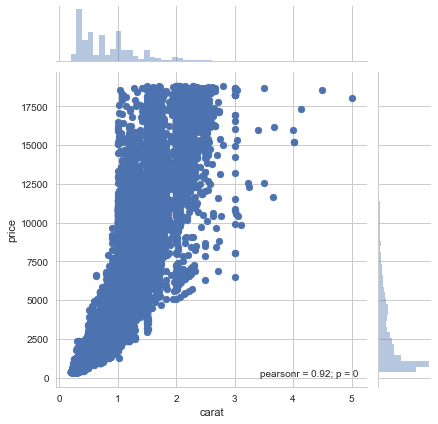

In [5]:
sns.jointplot(x="carat", y="price", data=diamonds)

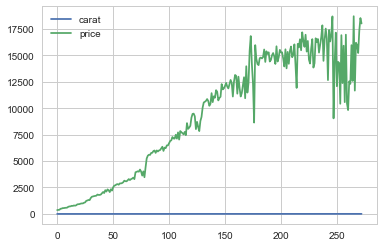

In [21]:
carat_price.plot()
plt.show()

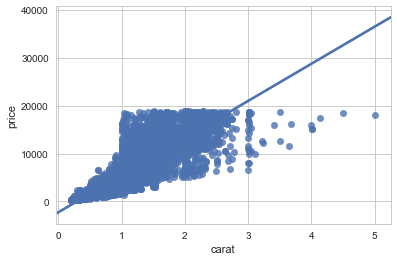

In [22]:
ax = sns.regplot(x="carat", y="price", data=diamonds)

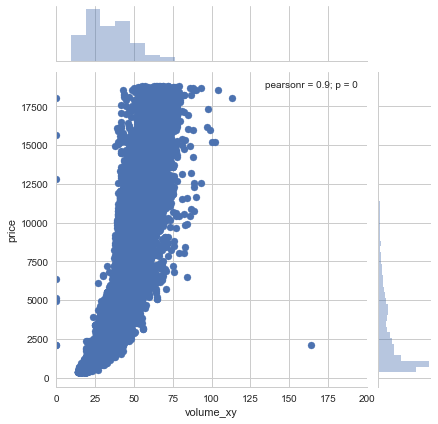

In [36]:
sns.jointplot(x="volume_xy", y="price", data=diamonds, xlim=(0,200))

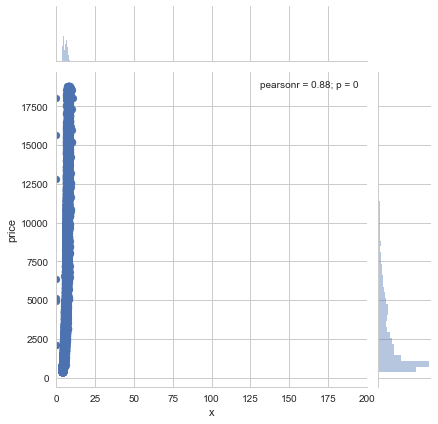

In [39]:
sns.jointplot(x="x", y="price", data=diamonds, xlim=(0,200))

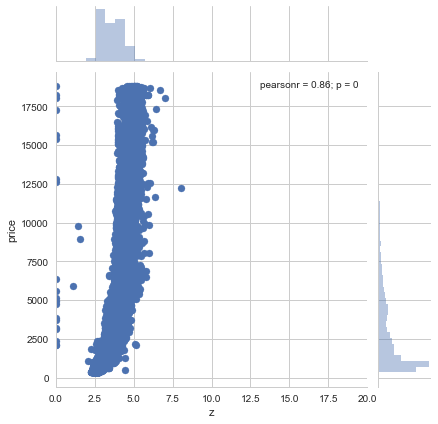

In [43]:
sns.jointplot(x="z", y="price", data=diamonds, xlim=(0,20))

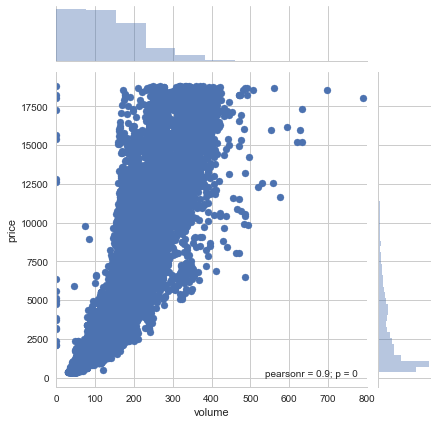

In [38]:
sns.jointplot(x="volume", y="price", data=diamonds, xlim=(0,800))

In [25]:
volume_price = diamonds.loc[:,['volume','price']]
volume_price = volume_price.groupby("volume").agg("mean").reset_index()
volume_price.tail()

,volume,price
432,633.0,17329.0
433,698.0,18531.0
434,790.0,18018.0
435,839.0,2022.5
436,3841.0,12210.0


In [27]:
cut_price = diamonds.loc[:,['cut','price']]
cut_price = cut_price.groupby("cut").agg("mean").reset_index()
cut_price

,cut,price
0,1,4358.757764
1,2,3928.864452
2,3,3981.759891
3,4,4584.257704
4,5,3457.541970


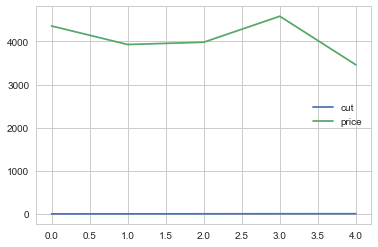

In [29]:
cut_price.plot()
plt.show()

In [46]:
ord('a')

97

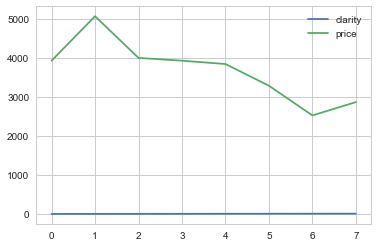

In [31]:
clarity_price.plot()
plt.show()

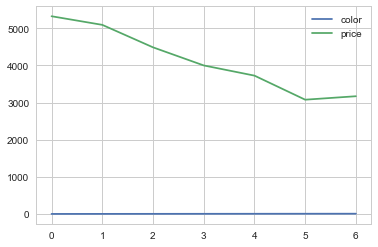

In [32]:
color_price.plot()
plt.show()

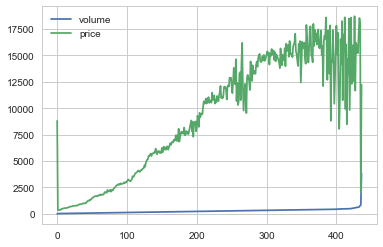

In [26]:
volume_price.plot()
plt.show()

- cut 과 price와의 관계
  - cut은 price와 단독적으로 비교하기에는 비례도 아니고 반비례도 아닌 것을 알수있습니다

In [19]:
cut_price = diamonds.loc[:,['cut','price']]
cut_price = cut_price.groupby("cut").agg("mean").reset_index()
cut_price

,cut,price
0,1,4358.757764
1,2,3928.864452
2,3,3981.759891
3,4,4584.257704
4,5,3457.541970


- color 과 price와의 관계
  - color는 투명할수록 가격이 높아지는것을 알수있습니다

In [18]:
color_price = diamonds.loc[:,['color','price']]
color_price = color_price.groupby("color").agg("mean").reset_index()
color_price

,color,price
0,1,5323.818020
1,2,5091.874954
2,3,4486.669196
3,4,3999.135671
4,5,3724.886397
5,6,3076.752475
6,7,3169.954096


- clarity 과 price와의 관계

In [14]:
clarity_price = diamonds.loc[:,['clarity','price']]
clarity_price = clarity_price.groupby("clarity").agg("mean").reset_index()
clarity_price

,clarity,price
0,1,3924.168691
1,2,5063.028606
2,3,3996.001148
3,4,3924.989395
4,5,3839.455391
5,6,3283.737071
6,7,2523.114637
7,8,2864.839106


- depth 과 price와의 관계

In [22]:
depth_price = diamonds.loc[:,['depth','price']]
depth_price = depth_price.groupby("depth").agg("mean").reset_index()
depth_price.tail()

,depth,price
179,72.2,2438.0
180,72.9,2691.0
181,73.6,1789.0
182,78.2,1262.0
183,79.0,2579.0


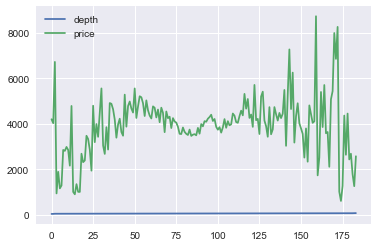

In [25]:
depth_price.plot()
plt.show()

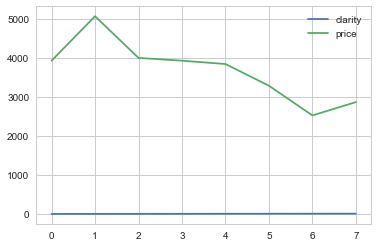

In [15]:
clarity_price.plot()
plt.show()

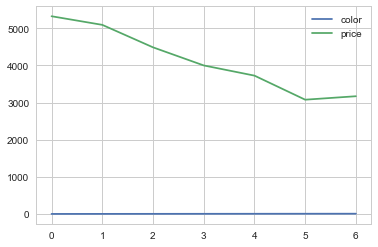

In [19]:
color_price.plot()
plt.show()

- table 과 price와의 관계

In [11]:
table_price = diamonds.loc[:,['table','price']]
table_price = table_price.groupby("table").agg("mean").reset_index()
table_price.tail()

,table,price
122,71.0,1633.0
123,73.0,2406.5
124,76.0,2362.0
125,79.0,2301.0
126,95.0,13387.0


- volume 과 price와의 관계

In [12]:
volume_price = diamonds.loc[:,['volume','price']]
volume_price = volume_price.groupby("volume").agg("mean").reset_index()
volume_price.tail()

,volume,price
432,633.0,17329.0
433,698.0,18531.0
434,790.0,18018.0
435,839.0,2022.5
436,3841.0,12210.0


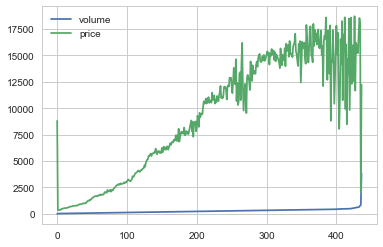

In [44]:
volume_price.plot()
plt.show()

## 1. *least squares method* 을 사용한 가중치 계산. 

In [13]:
c_diamonds = diamonds.loc[:,['carat','color','cut','clarity']]
c_numpy_array = c_diamonds.values

price_diamonds = diamonds.loc[:,['price']]
price_array = price_diamonds.values

x, resid, rank, s = np.linalg.lstsq(c_numpy_array, price_array)
x

array([[7026.203141  ],
       [-105.70435657],
       [-398.43615768],
       [ 131.24747208]])

In [14]:
result = pd.DataFrame(index = ["weight"])
result["carat"] = 7026.203141 
result["clarity"] = 131.24747208
result["color"] = -105.70435657
result["cut"] = -398.43615768
result

,carat,clarity,color,cut
weight,7026.203141,131.247472,-105.704357,-398.436158


- 가설 검증
 - 위의 표를 보면, carat의 가중치(7026)가 가장 높고, 그 다음은 cut(-398), 다음은 clarity(131), 그리고 color(-105) 의 가중치가 높다.
 - carat의 가중치가 가장 높다는 것을 확인하였습니다
 - 즉 weight 이 높을수록 다이아몬드의 가격이 높다는 것을 알수 있었습니다

## 2. *correlation* 을 사용한 가격과의 상관계수 계산. 

###  다른 조건을 생각하지 않고 각 속성과 가격과의 상관계수 확인

> price와 carat은 0.92라는 매우 높은 상관계수를 확인할수 있습니다

In [15]:
price_diamonds = diamonds['price']
price_array = price_diamonds.values

carat_diamonds = diamonds['carat']
carat_array = carat_diamonds.values

np.corrcoef(price_array, carat_array)[0][1]

0.921591301193477

> price와 cut의 상관계수

In [16]:
price_diamonds = diamonds['price']
price_array = price_diamonds.values

cut_diamonds = diamonds['cut']
cut_array = cut_diamonds.values

np.corrcoef(price_array, cut_array)[0][1]

-0.05349066086810448

> price와 color의 상관계수

In [17]:
price_diamonds = diamonds['price']
price_array = price_diamonds.values

color_diamonds = diamonds['color']
color_array = color_diamonds.values

np.corrcoef(price_array, color_array)[0][1]

-0.1725109281534674

> price와 clarity와의 상관계수

In [18]:
price_diamonds = diamonds['price']
price_array = price_diamonds.values

clarity_diamonds = diamonds['clarity']
clarity_array = clarity_diamonds.values

print(np.corrcoef(price_array, clarity_array)[0][1])

-0.14680007107894996


### *volume* 을 조건으로 하는 price와의 상관계수

- diamonds data를 같은 groupby를 이용해서 volume을 기준으로 정리합니다. 

In [19]:
df2 = diamonds.groupby(["volume", "price", "carat", "cut","color", "clarity"]).size().reset_index(name="Counts")
df2.tail()

,volume,price,carat,cut,color,clarity,Counts
46295,698.0,18531,4.50,1,1,1,1
46296,790.0,18018,5.01,1,1,1,1
46297,839.0,1970,0.51,3,6,5,1
46298,839.0,2075,0.51,5,6,5,1
46299,3841.0,12210,2.00,4,3,2,1


여기서 가중치를 구하기 위해서, 같은 volume인 (price, carat, cut, color, clarity) row들을 임시 데이터프레임으로 만들어 놓고, 그 안에서 price와 나머지 지표들의 상관계수를 구합니다. 이렇게 volume별로 구한 4가지 지표의 상관계수(4개 값)를 새로운 데이터프레임 (weights)에 loc를 이용해서 더합니다. 그렇게 weights를 다 구한 다음, weights의 각 column의 평균을 구해서 carat, cut, color, clarity각각의 price와의 상관계수를 구합니다. 

In [20]:
weights = pd.DataFrame()
weights["volume"] = 0
weights["carat_weight"] = 0
weights["clarity_weight"] = 0
weights["cut_weight"] = 0
weights["color_weight"] = 0

In [27]:
vols = df2["volume"].unique().tolist()

carat_weight = 0
clarity_weight = 0
cut_weight = 0
color_weight = 0
idx = 0

ls = {}

두 가지 방법으로 for문을 돌려보았습니다. 
첫번째는, 비교해야하는 컬럼들의 값들(volume이 32인 데이터가 4개라면, 4개의 carat값, clarity값, cut값, color값들)이 똑같으면, 표준편차가 0이 되고 상관계수를 계산할 때 분모가 0이 되어 에러가 날것 같아서 if문으로 표준편차가 0일때, 상관계수를 그냥 0으로 맞춰주었습니다. 

In [30]:
for val in vols:

    temp = df2[df2["volume"] == val]
    
    if temp['carat'].std() == 0:
        carat_weight = 0
    else:
        carat_weight = temp['price'].corr(temp['carat']) 
        
    if temp['clarity'].std() == 0:
        clarity_weight = 0
    else:
        clarity_weight = temp['price'].corr(temp['clarity']) 
        
    if temp['cut'].std() == 0:
        cut_weight = 0
    else:
        cut_weight = temp['price'].corr(temp['cut']) 
        
    if temp['color'].std() == 0:
        color_weight = 0
    else:
        color_weight = temp['price'].corr(temp['color']) 

    weights.loc[idx] = {"volume" : val, "carat_weight" : carat_weight, "clarity_weight" : clarity_weight, 
                        "cut_weight" : cut_weight, "color_weight" : color_weight}
    
    idx += 1
    
weights = weights.dropna()

carat_weight = weights["carat_weight"].sum() / len(weights)
clarity_weight = weights["clarity_weight"].sum() / len(weights)
cut_weight = weights["color_weight"].sum() / len(weights)
color_weight = weights["cut_weight"].sum() / len(weights)

print("price 와 carat의 상관계수: {} \nprice 와 clarity의 상관계수: {}\nprice 와 color의 상관계수: {}\nprice 와 cut의 상관계수: {}".format(carat_weight, clarity_weight, color_weight, cut_weight))

price 와 carat의 상관계수: -0.03334693451099808 
price 와 clarity의 상관계수: 0.5573863676887832
price 와 color의 상관계수: 0.1704702061846018
price 와 cut의 상관계수: 0.3255007192415494


두번째는, 표준편차 0 인것을 무시하고 그냥 volume이 같을 때 price와 carat, clarity, cut, color의 상관계수를 계산해 보았습니다. 

In [31]:
for val in vols:

    temp = df2[df2["volume"] == val]

    carat_weight = temp['price'].corr(temp['carat']) 
    clarity_weight = temp['price'].corr(temp['clarity']) 
    cut_weight = temp['price'].corr(temp['cut']) 
    color_weight = temp['price'].corr(temp['color']) 
    
    weights.loc[idx] = {"volume" : val,"carat_weight": carat_weight, "clarity_weight":clarity_weight, "cut_weight":cut_weight, "color_weight":color_weight}
    
    idx += 1
    
df = weights.dropna()
df

carat_weight = df["carat_weight"].sum() / len(df)
clarity_weight = df["clarity_weight"].sum() / len(df)
cut_weight = df["color_weight"].sum() / len(df)
color_weight = df["cut_weight"].sum() / len(df)

print("price 와 carat의 상관계수: {} \nprice 와 clarity의 상관계수: {}\nprice 와 color의 상관계수: {}\nprice 와 cut의 상관계수: {}".format(carat_weight, clarity_weight, color_weight, cut_weight))

price 와 carat의 상관계수: -0.035781593604856214 
price 와 clarity의 상관계수: 0.5609917128872876
price 와 color의 상관계수: 0.17031110253155324
price 와 cut의 상관계수: 0.3277946279936237
